### Imports

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "serif",
    "font.serif": "Times New Roman",
})

### Defining parameters

In [24]:
# Set the initial conditions
q0 = 1.0       # initial position
p0 = 0.0       # initial momentum

# Set the simulation parameters
dt = 0.1       # stepsize
t_max = 10.0   # maximum simulation time
m = 1
K = 1

### Hamiltonian dynamics for harmonic oscillator

In [25]:
def hamiltonian_dynamics(p, q): # for harmonic oscillator (991) and (992) in optimization
    return np.array([p/m, -K*q])

def gradient_potenital_energy(q): 
    return K*q

### Leapfrog method

100


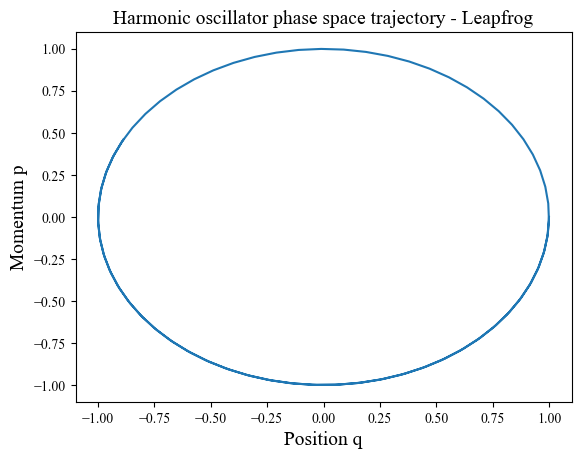

In [29]:
# Define the Leapfrog integrator
def leapfrog(q, p, dt):
    p_half = p - 0.5*dt*gradient_potenital_energy(q)
    q_next = q + dt*p_half
    p_next = p_half - 0.5*dt*gradient_potenital_energy(q_next)
    return q_next, p_next

# Initialize the trajectory arrays
t_leapfrog = np.arange(0, t_max, dt)
q_leapfrog = np.zeros_like(t_leapfrog)
p_leapfrog = np.zeros_like(t_leapfrog)

# Set the initial values
q_leapfrog[0] = q0
p_leapfrog[0] = p0

# Run the simulation using the Leapfrog integrator
for i in range(1, len(t_leapfrog)):
    q_leapfrog[i], p_leapfrog[i] = leapfrog(q_leapfrog[i-1], p_leapfrog[i-1], dt)

# Plot the trajectory in phase space
plt.plot(q_leapfrog, p_leapfrog)
plt.xlabel('Position q', fontsize = 14)
plt.ylabel('Momentum p', fontsize = 14)
plt.title('Harmonic oscillator phase space trajectory - Leapfrog', fontsize=14)
plt.show()

### Explicit Euler for harmonic oscillator

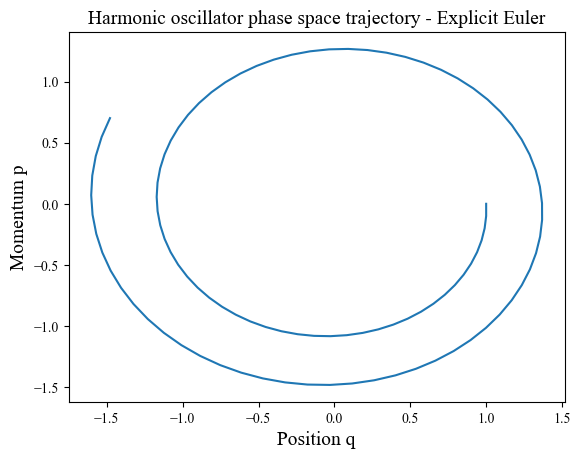

In [28]:
# Based on eurlers method in MCMC using hamiltonian dynamics
def explicit_euler(p, q, dt):
    p_next = p - dt * gradient_potenital_energy(q) # update position
    q_next = q + dt * p/m # update momentum
    return q_next, p_next

# Initialize the trajectory arrays
t_euler = np.arange(0, t_max, dt)
q_euler = np.zeros_like(t_euler)
p_euler = np.zeros_like(t_euler)

# Set the initial values
q_euler[0] = q0
p_euler[0] = p0

# Run the simulation using the Leapfrog integrator
for i in range(1, len(t_euler)):
    q_euler[i], p_euler[i] = explicit_euler(p_euler[i-1], q_euler[i-1], dt)

# Plot the trajectory in phase space
plt.plot(q_euler, p_euler)
plt.xlabel('Position q', fontsize = 14)
plt.ylabel('Momentum p', fontsize = 14)
plt.title('Harmonic oscillator phase space trajectory - Explicit Euler', fontsize = 14)
plt.show()